In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def dfs(G, node, depth, pos):
    subs = list(G.adj[node])
    assert(len(subs) <= 2)
    if len(subs) >= 1:
        dfs(G, subs[0], depth + 1, pos)
    global vertex_number
    pos[node] = {'pos': (vertex_number, depth)}
    vertex_number += 1
    if len(subs) == 2:
        dfs(G, subs[1], depth + 1, pos)

In [84]:
def draw_graph(g, filename='g.png'):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.grid(True)
    nx.draw(g, nx.get_node_attributes(g, 'pos'), with_labels=False, node_size=50, ax=ax)
    ax.invert_yaxis()
    plt.savefig(filename)

In [138]:
def draw_simple(graph_file, outputfile):
    global vertex_number
    G = nx.read_graphml(graph_file)
    root = 'n0'
    pos = {}
    vertex_number = 0
    dfs(G, root, 0, pos)
    nx.set_node_attributes(G, pos)
    draw_graph(G, outputfile)

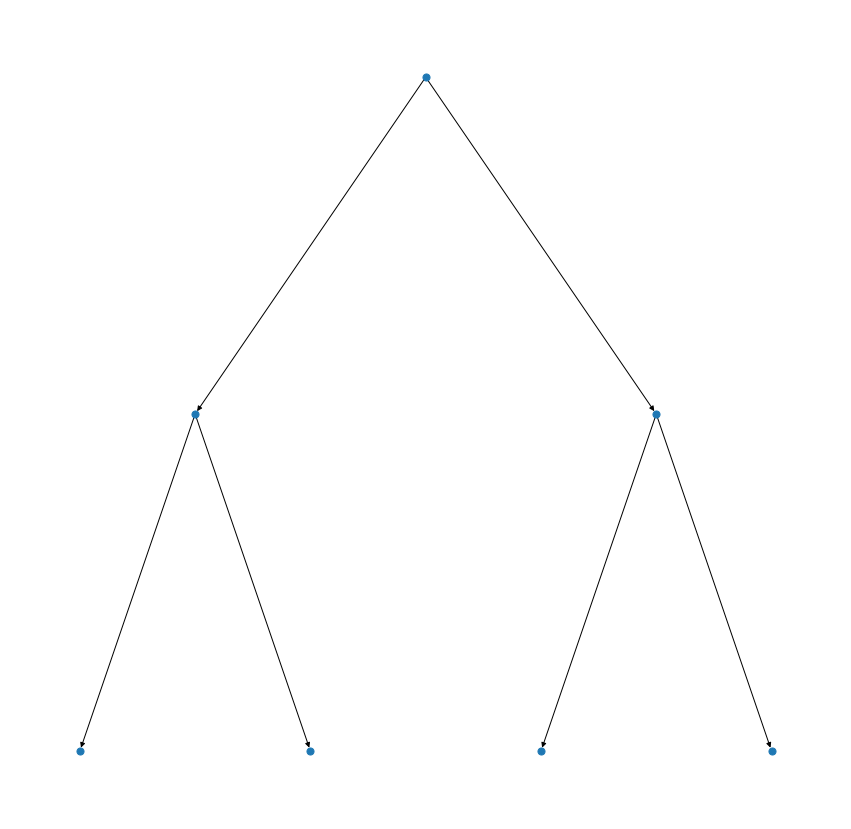

In [139]:
draw_simple('simple.xml', 'simple_simple.png')

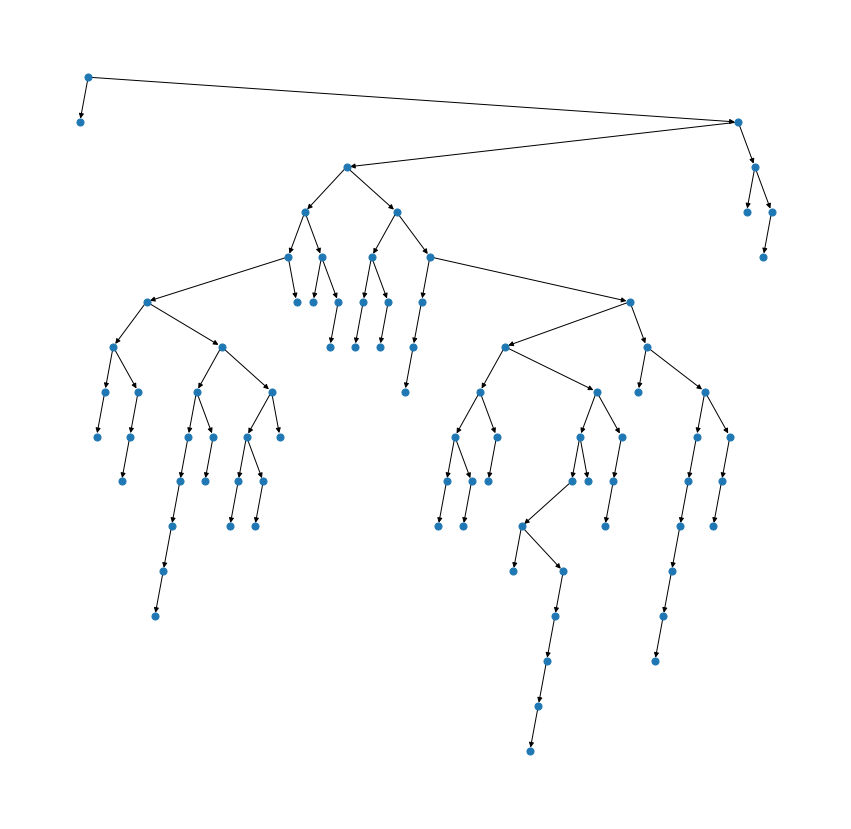

In [140]:
draw_simple('big_tree.xml', 'simple_big_tree.png')

In [34]:
import numpy as np
from collections import defaultdict

In [25]:
def shift_contur(contur, shift):
    for i, _ in enumerate(contur):
        contur[i][0] += shift
        contur[i][1] += shift

In [30]:
def merge_conturs(lhs, rhs):
    return[[lhs[i][0] if i < len(lhs) else rhs[i][0], 
            rhs[i][1] if i < len(rhs) else lhs[i][1]]
           for i in range(max(len(lhs), len(rhs)))]
        
    

In [144]:
def ltd_dfs(G, node, depth, total_shift, centr_shift):
    subs = list(G.adj[node])
    assert(len(subs) <= 2)
    if len(subs) == 0:
        return [[0, 0]]
    left_contur = ltd_dfs(G, subs[0], depth + 1, total_shift, centr_shift) if len(subs) >= 1 else []
    right_contur = ltd_dfs(G, subs[1], depth + 1, total_shift, centr_shift) if len(subs) == 2 else []
    
    children_min_len = min(len(left_contur), len(right_contur))
    shift = np.max([
        left_contur[d][1] + 1 - right_contur[d][0] 
        for d in range(children_min_len)
    ]) if children_min_len > 0 else 0
    
    if len(subs) == 2:
        total_shift[subs[1]] += shift
    
    shift_contur(right_contur, shift)    
    new_contur = merge_conturs(left_contur, right_contur)
    
    point = (left_contur[0][0] if len(left_contur) > 0 else right_contur[0][0] + 
        right_contur[0][1] if len(right_contur) > 0 else left_contur[0][1]) // 2
    centr_shift[node] = point
    new_contur = [[point, point]] + new_contur
    return new_contur
    

In [117]:
def dfs_with_shift(G, node, depth, pos, ancestor_shift, shift_array, centr_shift):
    subs = list(G.adj[node])
    assert(len(subs) <= 2)
    local_shift = ancestor_shift + shift_array[node]
    if len(subs) >= 1:
        dfs_with_shift(G, subs[0], depth + 1, pos, local_shift, shift_array, centr_shift)
    pos[node] = {'pos': (local_shift + centr_shift[node], depth)}
    if len(subs) == 2:
        dfs_with_shift(G, subs[1], depth + 1, pos, local_shift, shift_array, centr_shift)

In [134]:
def draw_closed(graph_file, filename='image.png'):
    G = nx.read_graphml(graph_file)
    root = 'n0'
    pos = {}
    total_shift = defaultdict(int)
    center_shift = defaultdict(int)
    ltd_dfs(G, root, 0, total_shift, center_shift)
    dfs_with_shift(G, root, 0, pos, 0, total_shift, center_shift)
    nx.set_node_attributes(G, pos)
    draw_graph(G, filename)

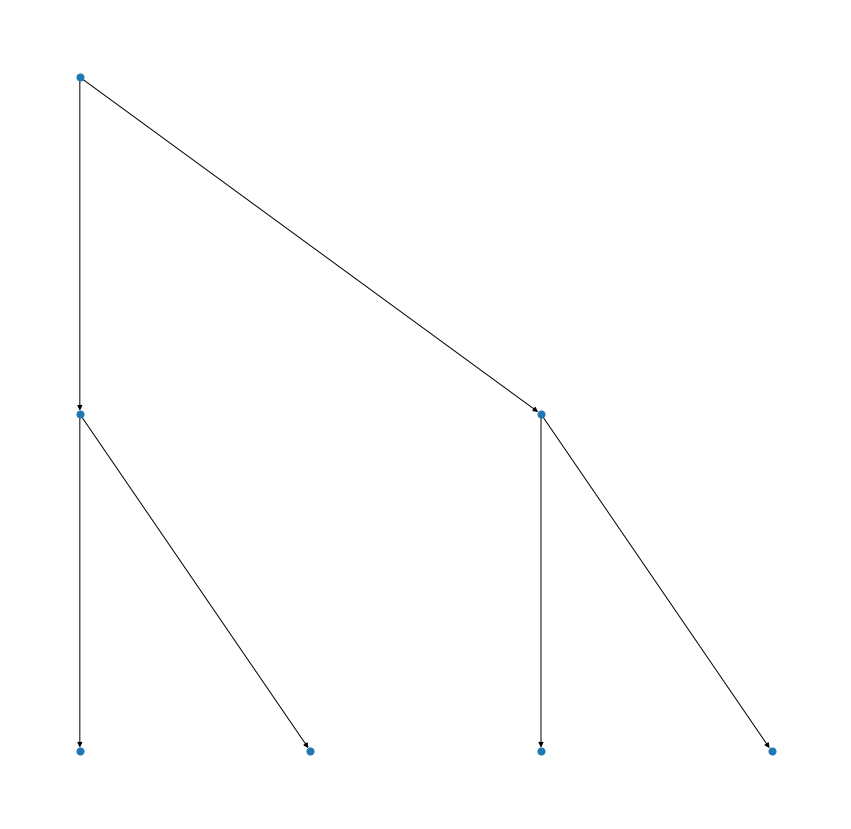

In [145]:
draw_closed('simple.xml', 'simple_closed.png')

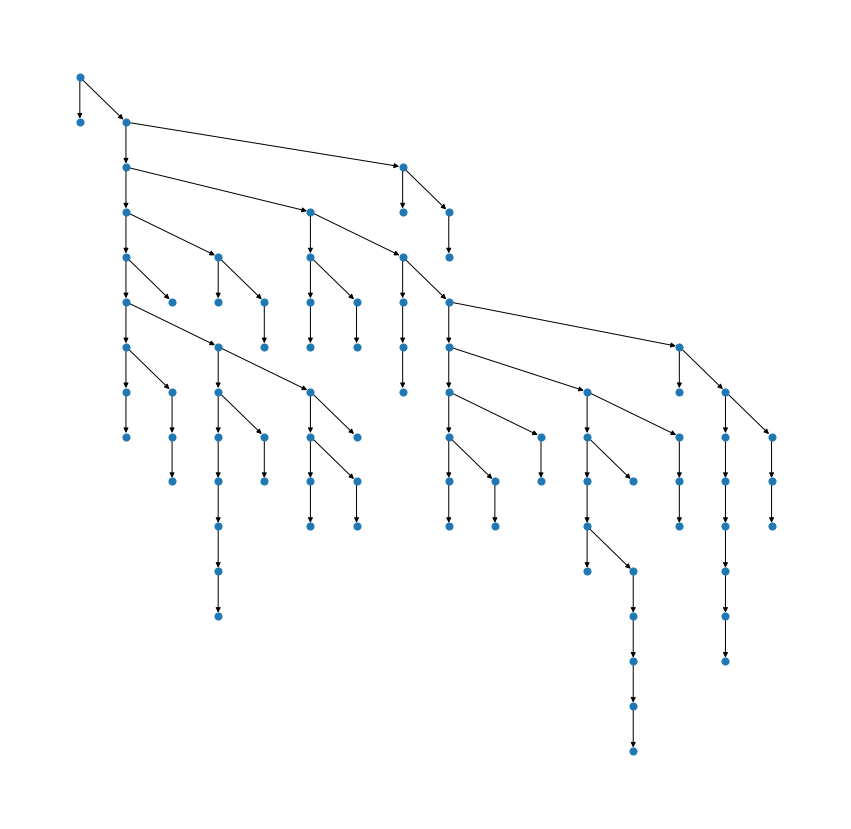

In [146]:
draw_closed('big_tree.xml', 'big_closed.png')

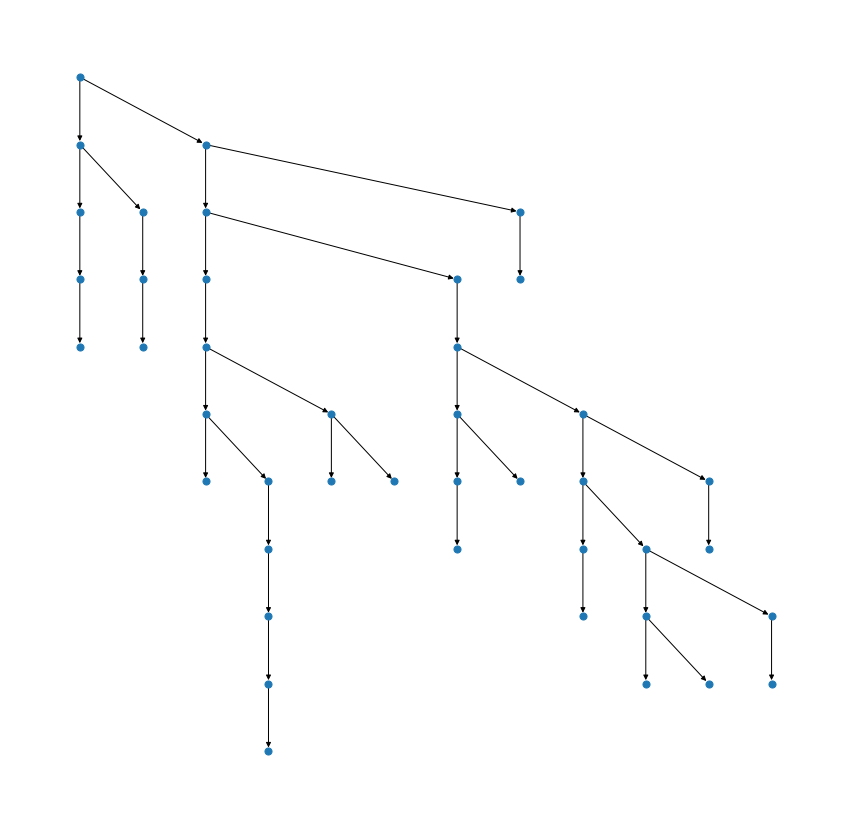

In [147]:
draw_closed('tree_n42.xml', 'tree_n42_closed.png')